In [1]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
from pylab import rcParams
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
#import liaison data
df = pd.read_csv("liaison.csv")
df['id_web'] = df['id_web'].fillna(0)
print(df)

     product_id   id_web
0          3847    15298
1          3849    15296
2          3850    15300
3          4032    19814
4          4039    19815
..          ...      ...
820        7203        0
821        7204        0
822        7247  13127-1
823        7329  14680-1
824        7338    16230

[825 rows x 2 columns]


In [3]:
#nettoyage des données de la table liaison par la suppression des données qui ont des id null
dfls = pd.read_csv("liaison.csv")
dfls['id_web'] = dfls['id_web'].fillna(0)
dfls = dfls[dfls.id_web != 0]
print(dfls)

     product_id   id_web
0          3847    15298
1          3849    15296
2          3850    15300
3          4032    19814
4          4039    19815
..          ...      ...
792        7023    15891
793        7025    15887
822        7247  13127-1
823        7329  14680-1
824        7338    16230

[734 rows x 2 columns]


In [4]:
#nettoyage des données de la table web par la suppression des données qui ont des sku null
dfw = pd.read_csv("web.csv")
dfw['sku'] = dfw['sku'].fillna(0)
dfw = dfw[dfw.sku != 0]
dfw

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [5]:
#import epr data
dfe = pd.read_csv("erp.csv")
dfe

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [6]:
#jointure des trois table premierement par le table web et liaison nettoyer on se basent sur le colonne sku du table web et id_web dans le table web
#deuxieme jointure entre le résultat de la jointure précédente et le table epr on niveau du colonne product_id dans les 2 tables
dfs = pd.merge(dfw, dfls, left_on='sku', right_on='id_web')
dfd = pd.merge(dfs, dfe, left_on='product_id', right_on='product_id')
#trier et supprimmer les valeurs dupliqués
dfd.sort_values("sku", inplace=True)
dfd.drop_duplicates(subset=['sku'] ,inplace=True)
#calcule de revenue et lettre dans dataframe
dfd['Revenue']=dfd['price']*dfd['total_sales']
dfd

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_type,post_mime_type,comment_count,product_id,id_web,onsale_web,price,stock_quantity,stock_status,Revenue
1201,10014,0,0,0,0.0,0.0,NaN,NaN,2.0,2019-04-04 15:45:23,...,attachment,image/jpeg,0.0,5913,10014,1,36.0,9,instock,0.0
497,10459,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-13 15:58:19,...,attachment,image/jpeg,0.0,4617,10459,1,67.5,1,instock,0.0
617,10775,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-17 21:28:52,...,attachment,image/jpeg,0.0,4709,10775,1,44.0,0,outofstock,0.0
549,10814,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-17 10:12:40,...,attachment,image/jpeg,0.0,4656,10814,1,43.0,3,instock,0.0
501,11049,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-13 16:07:49,...,attachment,image/jpeg,0.0,4619,11049,1,59.0,5,instock,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,8463,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-11-26 11:25:35,...,product,NaN,0.0,5574,8463,1,59.6,9,instock,0.0
409,9562,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-03-02 10:57:02,...,attachment,image/jpeg,0.0,4357,9562,1,39.0,0,outofstock,0.0
426,9636,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-03-22 10:44:57,...,product,NaN,0.0,4396,9636,1,62.0,7,instock,0.0
806,9937,0,0,0,0.0,4.0,taxable,NaN,2.0,2018-05-17 12:55:13,...,product,NaN,0.0,4932,9937,1,25.7,0,outofstock,102.8


In [10]:
totRev = dfd['Revenue'].sum()
print('totale du revenue:',totRev,'€')
mRev = dfd['Revenue'].mean()
print("moyenne Revenue:",mRev)
mPrice = dfd['price'].mean()
print("moyenne prix:",mPrice)
msq = dfd['stock_quantity'].mean()
print("moyenne stock_quantity:",msq)
mts = dfd['total_sales'].mean()
print("moyenne total_sales:",mts)

totale du revenue: 70568.6 €
moyenne Revenue: 98.83557422969186
moyenne prix: 32.49313725490198
moyenne stock_quantity: 28.746498599439775
moyenne total_sales: 4.012605042016807


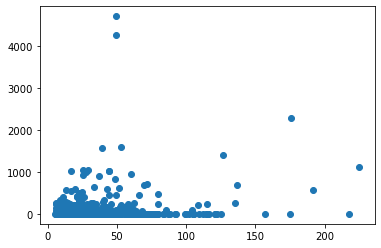

In [11]:
#scatter qui montre la distrubition de prix paraport au revenue
y = dfd['Revenue']; 
x = dfd['price']; 
plt.scatter(x, y)

{'whiskers': [<matplotlib.lines.Line2D at 0x18fb9cb3c40>,
 'caps': [<matplotlib.lines.Line2D at 0x18fb9cc5340>,
 'boxes': [<matplotlib.lines.Line2D at 0x18fb9cb38e0>],
 'medians': [<matplotlib.lines.Line2D at 0x18fb9cc5a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x18fb9cc5d60>],
 'means': []}

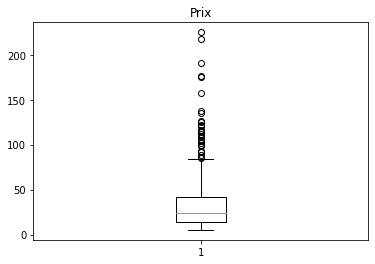

In [12]:
fig1, ax1 = plt.subplots()
ax1.set_title('Prix')
ax1.boxplot(dfd['price'])

In [14]:
#calcule de z-zero du prix
dfl = pd.DataFrame(dfd,columns=['price','Revenue'])
dfl
z_score_prix = (dfl['price'] - dfl['price'].mean())/dfl['price'].std(ddof=0)
dfl['z_score_prix'] = z_score_prix
dfz = dfl[dfl.z_score_prix > 2]
dfz

,price,Revenue,z_score_prix
1310,99.0,0.0,2.393104
865,105.0,0.0,2.609001
132,88.4,0.0,2.011686
404,126.5,1391.5,3.382632
1312,115.0,0.0,2.968829
862,105.0,0.0,2.609001
456,109.6,0.0,2.774522
875,112.0,0.0,2.860881
1306,115.0,230.0,2.968829
765,137.0,685.0,3.760451


In [15]:
#calcule de IQR
Q1 = np.percentile(dfl['price'], 25, interpolation = 'midpoint') 
Q3 = np.percentile(dfl['price'], 75, interpolation = 'midpoint') 
Q = Q3-Q1
Q

28.050000000000004

In [19]:
#calcule des outliers de prix
low_lim = Q1 - 1.5 * Q
up_lim = Q3 + 1.5 * Q
print('la limite la plus bas est:', low_lim)
print('la limite la plus haute est:', up_lim)

la limite la plus bas est: -27.975
la limite la plus haute est: 84.22500000000001


 outlier in the dataset is [99.0, 105.0, 88.4, 126.5, 115.0, 105.0, 109.6, 85.6, 86.8, 112.0, 115.0, 137.0, 217.5, 105.6, 114.0, 93.0, 122.0, 102.3, 124.8, 135.0, 191.3, 121.0, 121.0, 116.4, 175.0, 100.0, 225.0, 92.0, 108.5, 104.0, 176.0, 157.0]
      price  Revenue  z_score_prix
1201   36.0      0.0      0.126187
497    67.5      0.0      1.259646
617    44.0      0.0      0.414049
549    43.0      0.0      0.378067
501    59.0      0.0      0.953792
...     ...      ...           ...
1010   59.6      0.0      0.975381
409    39.0      0.0      0.234135
426    62.0      0.0      1.061740
806    25.7    102.8     -0.244436
1      25.0    250.0     -0.269624

[682 rows x 3 columns]


C:\Users\Joe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

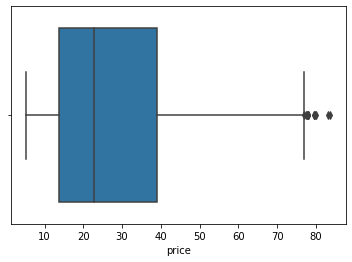

In [20]:
#extraire les outliers du prix de notre dataframe
outlier =[]
for x in dfl['price']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)
mn = dfl[dfl.price < up_lim]
print(mn)
sns.boxplot(mn['price'])

In [21]:
#separation du groupe prix et ces outliers
lst = dfd['price'].tolist()
lst1 = dfd['Revenue'].tolist()
df = pd.DataFrame(lst1, 
                columns=['Revenue'],
                index=list(range(1,715)))

def estimate_gaussian(dataset):

    mu = np.mean(dataset) # moyenne cf mu
    sigma = np.std(dataset) # écart_type/standard deviation
    limit = sigma * 1.5

    min_threshold = mu - limit
    max_threshold = mu + limit

    return mu, sigma, min_threshold, max_threshold

mu, sigma, min_threshold, max_threshold = estimate_gaussian(df.values)

condition1 = (df < min_threshold)
condition2 = (df > max_threshold)

outliers1 = np.extract(condition1, df)
outliers2 = np.extract(condition2, df)

outliers = np.concatenate((outliers1, outliers2), axis=0)

In [22]:
#separation du groupe prix et ces outliers

df1 = pd.DataFrame(lst, 
                columns=['price'],
                index=list(range(1,715)))

def estimate_gaussian(dataset):

    mu = np.mean(dataset) # moyenne cf mu
    sigma = np.std(dataset) # écart_type/standard deviation
    limit = sigma * 1.5

    min_threshold = mu - limit
    max_threshold = mu + limit

    return mu, sigma, min_threshold, max_threshold

mu, sigma, min_threshold, max_threshold = estimate_gaussian(df1.values)

condition1 = (df1 < min_threshold)
condition2 = (df1 > max_threshold)

outliers1 = np.extract(condition1, df1)
outliers2 = np.extract(condition2, df1)

outlier = np.concatenate((outliers1, outliers2), axis=0)

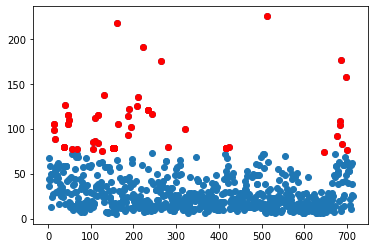

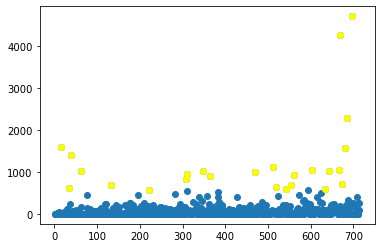

In [23]:
df_red = df1[df1.values==outlier]
plt.scatter(df1.index,df1.values)
plt.scatter(df_red.index,df_red.values,c='red')
plt.show()
df_reds = df[df.values==outliers]
plt.scatter(df.index,df.values)
plt.scatter(df_reds.index,df_reds.values,c='yellow')
plt.show()

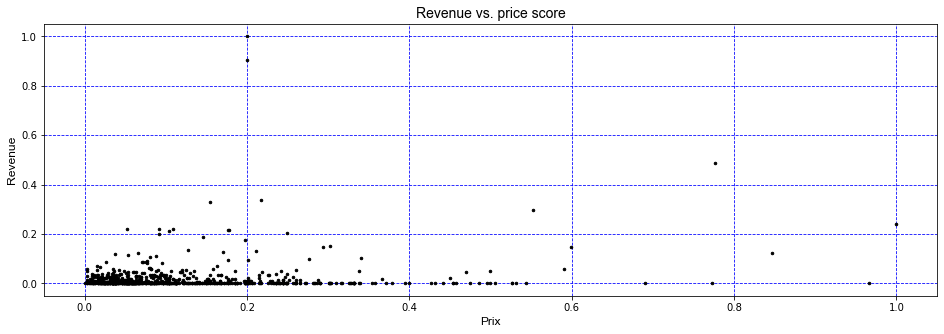

In [27]:
rcParams['figure.figsize']= 16, 5
plt.plot(dfd['price'], dfd['Revenue'],
        linestyle=None, linewidth=0, marker='.', markersize=5, color='black')
plt.title('Revenue vs. price score', family='Arial', fontsize=14)
plt.grid(which='major', color='blue', linestyle= '--')
plt.xlabel("Prix", family='Arial', fontsize=12)
plt.ylabel('Revenue', family='Arial', fontsize=12)
plt.show()

No handles with labels found to put in legend.


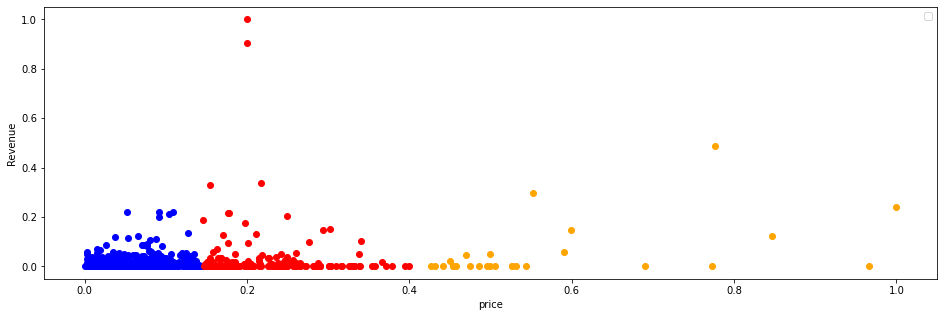

In [28]:
km=KMeans(n_clusters=3)
km
dfd.iloc[:,[3, 11, 29]]. head(5)
#all rows for rquired columns
y_predicted = km.fit_predict(dfd[['price','Revenue']])
y_predicted
#not intereting[10:38]
dfd['cluster']=y_predicted
dfd.head(20)
df1 = dfd[dfd.cluster==0]
df2 = dfd[dfd.cluster==1]
df3 = dfd[dfd.cluster==2]
plt.scatter(df1.price,df1['Revenue'],color='blue')
plt.scatter(df2.price,df2['Revenue'],color='red')
plt.scatter(df3.price,df3['Revenue'],color='orange')
plt.xlabel('price')
plt.ylabel('Revenue')
plt.legend()

No handles with labels found to put in legend.


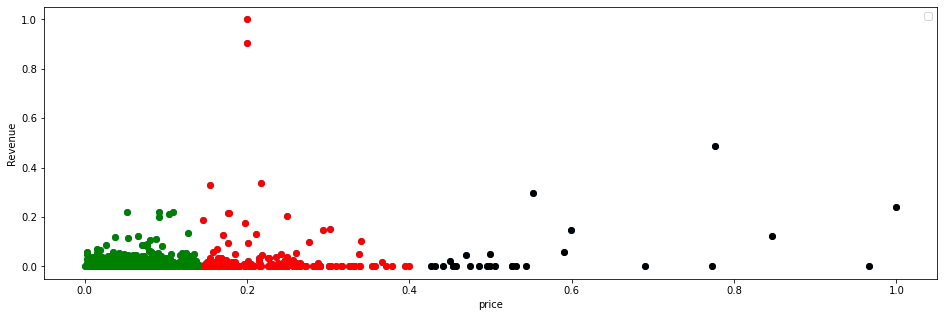

In [31]:
scaler = MinMaxScaler()
scaler.fit(dfd[['Revenue']])
dfd['Revenue'] = scaler.transform(dfd[['Revenue']])
#wine_profile
scaler.fit(dfd[['price']])
dfd['price'] = scaler.transform(dfd[['price']])
dfd
plt.scatter(dfd.price,dfd['Revenue'])
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(dfd[['price','Revenue']])
y_predicted
dfd['cluster']=y_predicted
dfd.head()
km.cluster_centers_
df1 = dfd[dfd.cluster==0]
df2 = dfd[dfd.cluster==1]
df3 = dfd[dfd.cluster==2]
plt.scatter(df1.price,df1['Revenue'],color='green')
plt.scatter(df2.price,df2['Revenue'],color='red')
plt.scatter(df3.price,df3['Revenue'],color='black')
plt.xlabel('price')
plt.ylabel('Revenue')
plt.legend()

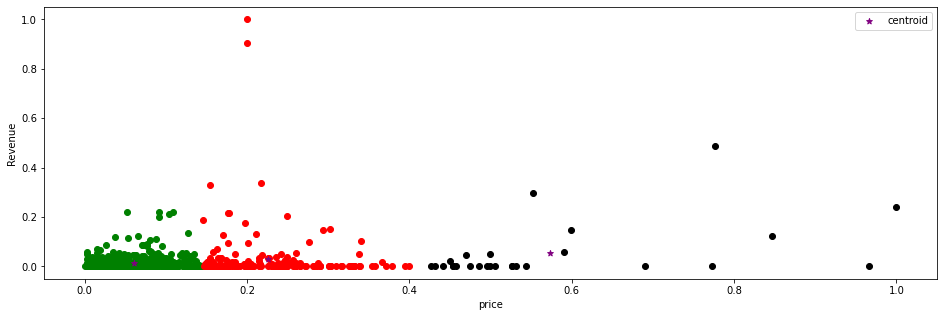

In [30]:
df1 = dfd[dfd.cluster==0]
df2 = dfd[dfd.cluster==1]
df3 = dfd[dfd.cluster==2]
plt.scatter(df1.price,df1['Revenue'],color='green')
plt.scatter(df2.price,df2['Revenue'],color='red')
plt.scatter(df3.price,df3['Revenue'],color='black')
plt.xlabel('price')
plt.ylabel('Revenue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

C:\Users\Joe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


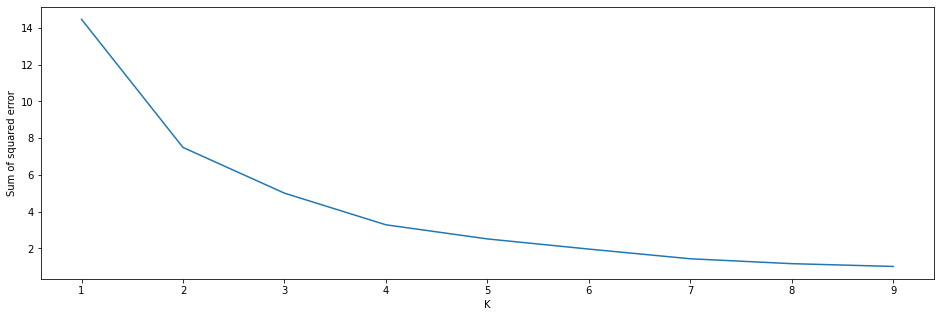

In [32]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dfd[['price','Revenue']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [33]:
silhouette_score(dfd[['price','Revenue']], km.labels_)
km_per_k =[KMeans(n_clusters=k, random_state=42).fit(dfd[['price','Revenue']]) for k in range(1,10)]
silhouette_scores =[silhouette_score(dfd[['price','Revenue']], model.labels_)
                    for model in km_per_k[1:]]
silhouette_scores

C:\Users\Joe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[0.6464841371809659,
 0.6001598424145684,
 0.6054256214469356,
 0.563229597507803,
 0.5871724207773052,
 0.5331293258162384,
 0.4746542390548536,
 0.47663774715315904]

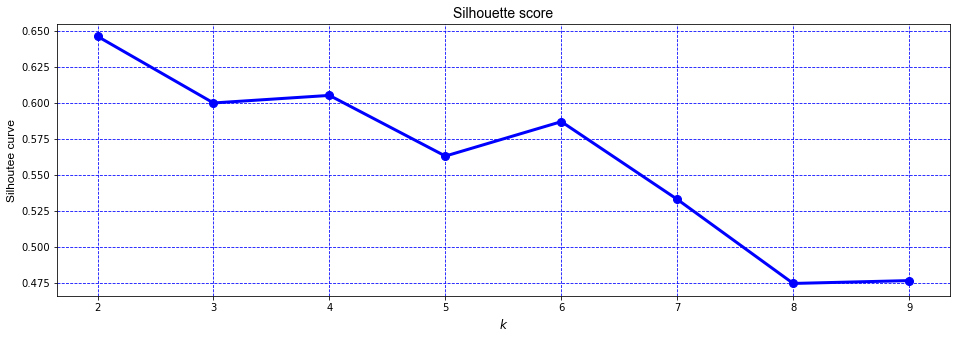

In [34]:
rcParams['figure.figsize']= 16, 5
plt.plot(range(2, 10), silhouette_scores, "bo-", linewidth=3, markersize=8, color='blue', label="Silhoutee curve")
plt.title('Silhouette score', family='Arial', fontsize=14)
plt.grid(which='major', color='blue', linestyle= '--')
plt.xlabel("$k$", family='Arial', fontsize=12)
plt.ylabel('Silhoutee curve', family='Arial', fontsize=12)
#calculate the optimal number of cluster
k= np.argmax(silhouette_scores) + 2

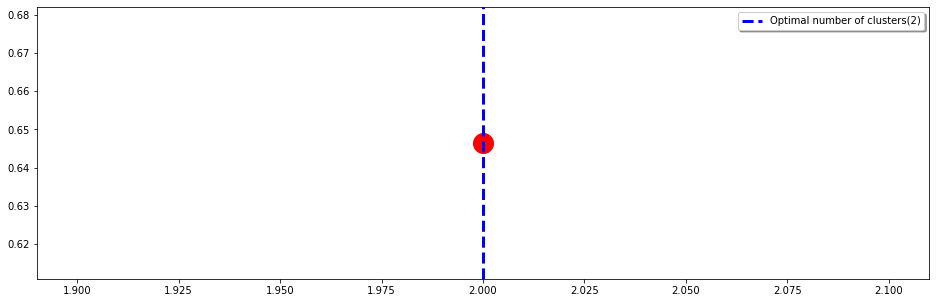

le chiffre optimale pour cette cluster des données est 2.


In [36]:
plt.axvline(x = k, linewidth =3, color = "blue", linestyle = '--',
               label='Optimal number of clusters({})'. format(k))
plt.scatter(k, silhouette_scores[k-2], c='red', s=400)
plt.legend(shadow=True)
plt.show()
print('le chiffre optimale pour cette cluster des données est {}.'. format(k))